# Importing the necessary libraries and loading the dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, recall_score, precision_score

# Fetching the Cancer dataset

In [2]:
from sklearn.datasets import load_breast_cancer

In [3]:
df = pd.DataFrame(load_breast_cancer()['data'],
                  columns=load_breast_cancer()['feature_names'])

In [4]:
df['y'] = load_breast_cancer()['target']

In [5]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


# Performing the required Data Pre-Processing

In [6]:
# Getting the dimensions of the data
print("Cancer data set dimensions : {}".format(df.shape))

Cancer data set dimensions : (569, 31)


In [7]:
# Checking for missing values
print(f'The dataset has {df.isnull().sum().sum()} missing values')

The dataset has 0 missing values


In [8]:
df.info()

# The summary statistics below clearly show that all the attribites are numerical in  nature
# As was shown above the statistics below justifies that none of them have any missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [9]:
df.describe()

# From the above statistical table we can observe that the max value of 'mean area' attribute is 2501 whereas the max value of 'smoothness' atribute is 0.1634.
# Clearly the huge difference in the scales of the attributes is evident.
# Thus we'll use standardization to bring the scales of the attributes to the comparable scales

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,y
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [10]:
df['y'].value_counts()
# 0 - malignant
# 1 - benign
# The data is not imbalanced.
# Thus, the dataset has 30 numerical features in total and 1 class column. There are no missing and null values in the dataset.

1    357
0    212
Name: y, dtype: int64

In [11]:
X_initial = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [12]:
scaler = StandardScaler() # Scaling the input features
X_scaled = scaler.fit_transform(X_initial)
X = pd.DataFrame(X_scaled)

# Data Analysis and Exploration

<AxesSubplot:xlabel='y', ylabel='count'>

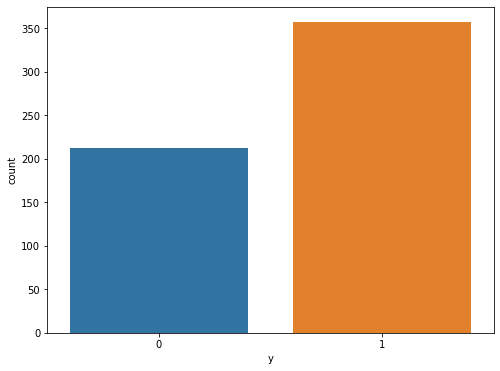

In [13]:
plt_1 = plt.figure(figsize=(8, 6))
sns.countplot(x = 'y',data = df)

<AxesSubplot:>

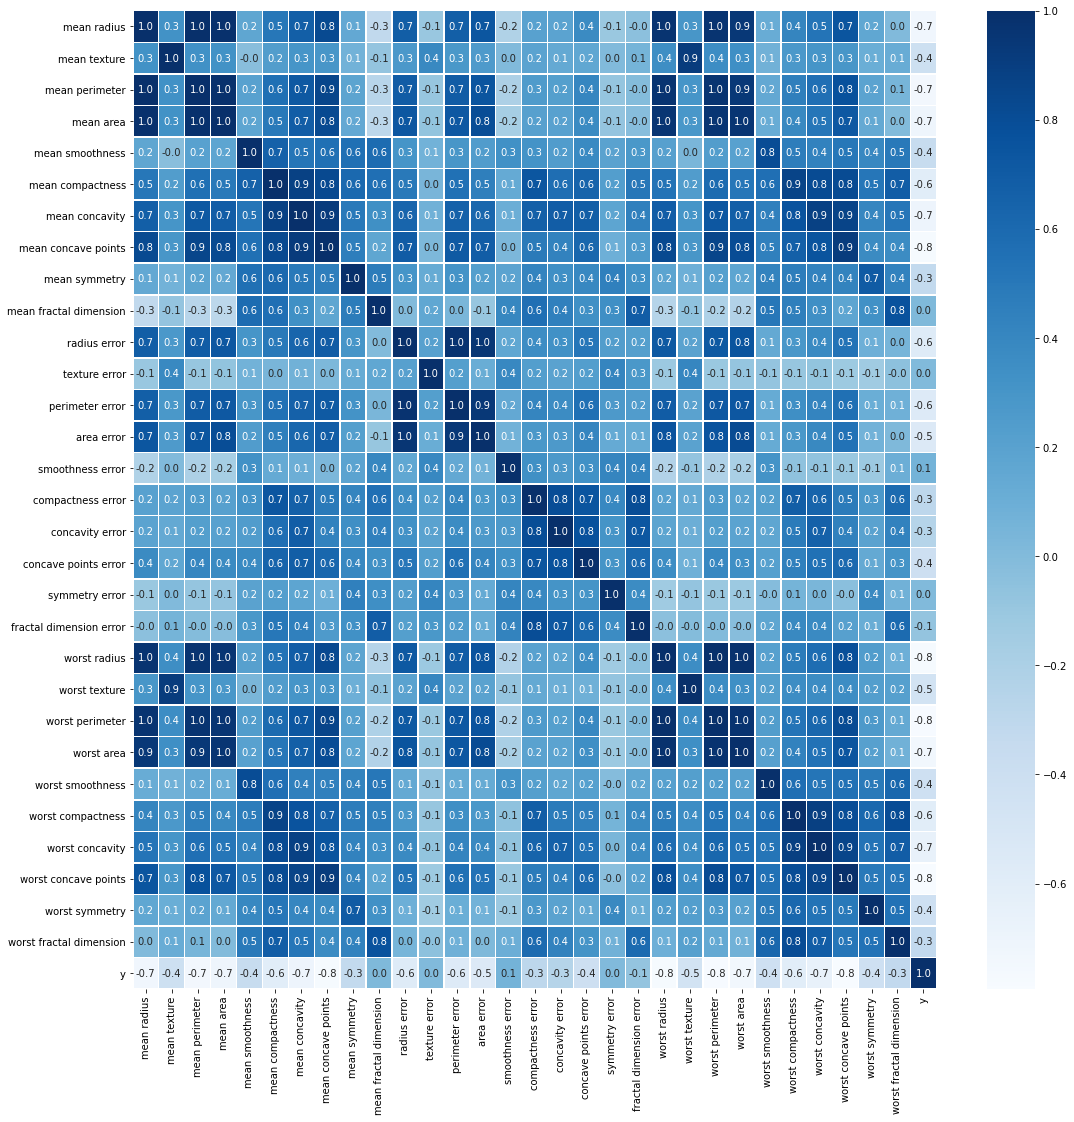

In [14]:
# Plotting the correlation among variables uisng heatmap
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap = "Blues")

# mean radius, mean perimeter and mean area are highly corrrelated.
# radius error, perimeter error and area error are highly correlated.
# worst concativity, worst concave points and worst concave points are also highly correlated.
# Similarly we can observe high correlation among many attributes in the dataset.

In [15]:
# Numerically seeing the correlations
df.corr()['y'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

# Splitting the dataset into train and test set

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Decision Tree Model

In [17]:
# Creating Decision Tree classifer object
decision_tree = DecisionTreeClassifier()

# Training Decision Tree Classifer
decision_tree = decision_tree.fit(X_train,y_train)

# Predicting the response for test dataset
pred_dt = decision_tree.predict(X_test)

In [18]:
# Let us check the model performance on the train set which is expected to be high
y_train_pred = decision_tree.predict(X_train)
print("Accuracy:",metrics.accuracy_score(y_train, y_train_pred))

Accuracy: 1.0


In [19]:
# Checking performance on the test set
print("Accuracy:",metrics.accuracy_score(y_test, pred_dt))

Accuracy: 0.9298245614035088


In [20]:
print(f'Recall Score: {recall_score(y_test, pred_dt)}')     
print(f'Precision Score: {precision_score(y_test, pred_dt)}')  
print(f'ROC-AUC Score: {roc_auc_score(y_test, pred_dt)}')    
print("\n confustion matrix on validation data: \n" + str(confusion_matrix(y_test, pred_dt)))

Recall Score: 0.9295774647887324
Precision Score: 0.9565217391304348
ROC-AUC Score: 0.9299050114641336

 confustion matrix on validation data: 
[[40  3]
 [ 5 66]]


# Random Forest 

In [21]:
random_forest = RandomForestClassifier(random_state=0, warm_start = True)

In [22]:
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0, warm_start=True)

In [23]:
pred_rf = random_forest.predict(X_test)

In [24]:
# Checking the accuracy of the Random Forest Model
print("Accuracy:",metrics.accuracy_score(y_test, pred_rf))

Accuracy: 0.9649122807017544


In [25]:
print(f'Recall Score: {recall_score(y_test, pred_rf)}')     
print(f'Precision Score: {precision_score(y_test, pred_rf)}')  
print(f'ROC-AUC Score: {roc_auc_score(y_test, pred_rf)}')    
print("\n confustion matrix on validation data: \n" + str(confusion_matrix(y_test, pred_rf)))

Recall Score: 0.9859154929577465
Precision Score: 0.958904109589041
ROC-AUC Score: 0.9580740255486406

 confustion matrix on validation data: 
[[40  3]
 [ 1 70]]


# Gradient Boosting Method

In [26]:
gradient_booster = GradientBoostingClassifier()
gradient_booster.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [27]:
gradient_booster.fit(X_train, y_train)

GradientBoostingClassifier()

In [28]:
pred_gb = gradient_booster.predict(X_test)

In [29]:
# Checking the accuracy of the Gradient Boosting Model
print("Accuracy:",metrics.accuracy_score(y_test, pred_gb))

Accuracy: 0.956140350877193


In [30]:
print(f'Recall Score: {recall_score(y_test, pred_gb)}')     
print(f'Precision Score: {precision_score(y_test, pred_gb)}')  
print(f'ROC-AUC Score: {roc_auc_score(y_test, pred_gb)}')    
print("\n confustion matrix on validation data: \n" + str(confusion_matrix(y_test, pred_gb)))

Recall Score: 0.971830985915493
Precision Score: 0.9583333333333334
ROC-AUC Score: 0.9510317720275139

 confustion matrix on validation data: 
[[40  3]
 [ 2 69]]


# KNN Model

In [31]:
knn_model = KNeighborsClassifier()

# Train the model using the training sets
knn_model.fit(X_train, y_train)

# Predicting Output
pred_knn = knn_model.predict(X_test) 

In [32]:
print("Accuracy:",metrics.accuracy_score(y_test, pred_knn))

Accuracy: 0.9473684210526315


In [33]:
print(f'Recall Score: {recall_score(y_test, pred_knn)}')     
print(f'Precision Score: {precision_score(y_test, pred_knn)}')  
print(f'ROC-AUC Score: {roc_auc_score(y_test, pred_knn)}')    
print("\n confustion matrix on validation data: \n" + str(confusion_matrix(y_test, pred_knn)))

Recall Score: 0.9577464788732394
Precision Score: 0.9577464788732394
ROC-AUC Score: 0.9439895185063871

 confustion matrix on validation data: 
[[40  3]
 [ 3 68]]


# Using Grid Search for Decision Tree Model

In [34]:
estimator = DecisionTreeClassifier()

In [35]:
rf_tuned_parameters = {'criterion': ["gini", "entropy"], 
                       'max_depth': [10, 20, 50, 100], 
                       'min_samples_leaf': [10, 20, 50]}

In [36]:
cv_grid = GridSearchCV(estimator, param_grid = rf_tuned_parameters, scoring = 'roc_auc', verbose = 5)
cv_grid.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] criterion=gini, max_depth=10, min_samples_leaf=10 ...............
[CV]  criterion=gini, max_depth=10, min_samples_leaf=10, score=0.976, total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_leaf=10 ...............
[CV]  criterion=gini, max_depth=10, min_samples_leaf=10, score=0.937, total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_leaf=10 ...............
[CV]  criterion=gini, max_depth=10, min_samples_leaf=10, score=0.992, total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_leaf=10 ...............
[CV]  criterion=gini, max_depth=10, min_samples_leaf=10, score=0.972, total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_leaf=10 ...............
[CV]  criterion=gini, max_depth=10, min_samples_leaf=10, score=0.936, total=   0.0s
[CV] criterion=gini, max_depth=10, min_samples_leaf=20 ...............
[CV]  criterion=gini, max_depth=10, min_samples_leaf=20, score=0.975, total=   0.0s
[CV] cri

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s



[CV] criterion=gini, max_depth=10, min_samples_leaf=50 ...............
[CV]  criterion=gini, max_depth=10, min_samples_leaf=50, score=0.967, total=   0.0s
[CV] criterion=gini, max_depth=20, min_samples_leaf=10 ...............
[CV]  criterion=gini, max_depth=20, min_samples_leaf=10, score=0.982, total=   0.0s
[CV] criterion=gini, max_depth=20, min_samples_leaf=10 ...............
[CV]  criterion=gini, max_depth=20, min_samples_leaf=10, score=0.937, total=   0.0s
[CV] criterion=gini, max_depth=20, min_samples_leaf=10 ...............
[CV]  criterion=gini, max_depth=20, min_samples_leaf=10, score=0.984, total=   0.0s
[CV] criterion=gini, max_depth=20, min_samples_leaf=10 ...............
[CV]  criterion=gini, max_depth=20, min_samples_leaf=10, score=0.971, total=   0.0s
[CV] criterion=gini, max_depth=20, min_samples_leaf=10 ...............
[CV]  criterion=gini, max_depth=20, min_samples_leaf=10, score=0.912, total=   0.0s
[CV] criterion=gini, max_depth=20, min_samples_leaf=20 ..............

[CV]  criterion=entropy, max_depth=10, min_samples_leaf=20, score=0.944, total=   0.0s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=20 ............
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=20, score=0.992, total=   0.0s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=20 ............
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=20, score=0.955, total=   0.0s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=20 ............
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=20, score=0.968, total=   0.0s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=50 ............
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=50, score=0.962, total=   0.0s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=50 ............
[CV]  criterion=entropy, max_depth=10, min_samples_leaf=50, score=0.912, total=   0.0s
[CV] criterion=entropy, max_depth=10, min_samples_leaf=50 ............
[CV]  criterion=entropy, max_depth=10, min_samples_l

[CV]  criterion=entropy, max_depth=100, min_samples_leaf=50, score=0.947, total=   0.0s
[CV] criterion=entropy, max_depth=100, min_samples_leaf=50 ...........
[CV]  criterion=entropy, max_depth=100, min_samples_leaf=50, score=0.949, total=   0.0s


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    1.6s finished


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 50, 100],
                         'min_samples_leaf': [10, 20, 50]},
             scoring='roc_auc', verbose=5)

In [37]:
# Priting the best parameters found
best_parameters = cv_grid.best_estimator_.get_params()
print(best_parameters)

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 10, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'presort': 'deprecated', 'random_state': None, 'splitter': 'best'}


In [38]:
for param_name in sorted(rf_tuned_parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

	criterion: 'entropy'
	max_depth: 10
	min_samples_leaf: 10


In [39]:
pred_test = cv_grid.predict(X_test)
print(recall_score(y_test, pred_test))     
print(precision_score(y_test, pred_test))  
print(roc_auc_score(y_test, pred_test))    
print("confustion matrix on validation data: \n" + str(confusion_matrix(y_test, pred_test)))

1.0
0.9466666666666667
0.9534883720930233
confustion matrix on validation data: 
[[39  4]
 [ 0 71]]


In [40]:
print("Accuracy:",metrics.accuracy_score(y_test, pred_test))

Accuracy: 0.9649122807017544


# Comparing the results of various models

## Decison Tree
- Precison: 0.9577464788732394
- Recall: 0.9577464788732394
- ROC AUC Score: 0.9439895185063871
- Accuracy: 0.9473684210526315

## Random Forest
- Precison: 0.958904109589041
- Recall: 0.9859154929577465
- ROC AUC Score: 0.9580740255486406
- Accuracy: 0.956140350877193

## Gradient Boosting
- Precison: 0.9583333333333334
- Recall: 0.971830985915493
- ROC AUC Score: 0.9510317720275139
- Accuracy: 0.956140350877193

## K-Nearest Neighbour
- Precison: 0.9577464788732394
- Recall: 0.9577464788732394
- ROC AUC Score: 0.9439895185063871
- Accuracy: 0.9473684210526315

## Performance of decision tree after tuning the hyperparameters
- Precison: 0.9466666666666667
- Recall: 1.0
- ROC AUC Score: 0.9534883720930233
- Accuracy: 0.9649122807017544

# Conslusion

### If we go with accuracy, then decision tree with tuned hyperparameters seems to be performing the best, followed by Gradient Boosting and Random Forest Method with almost the same accuracies.